In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_absolute_error

In [3]:
data = pd.read_csv('C:/Users/Egor/Desktop/housing.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [83]:
y, X = data['MEDV'].values, data.drop(['MEDV'], axis = 1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
scale = StandardScaler(with_mean = False, with_std = False)
poly = PolynomialFeatures(3, include_bias = False, interaction_only = True)
X_train, X_test = scale.fit_transform(X_train), scale.fit_transform(X_test)
X_train, X_test = poly.fit_transform(X_train), poly.fit_transform(X_test)

XTX = X_train.T@X_train
print('Cond. number XTX: ', np.linalg.cond(XTX))
a = np.linalg.inv(XTX)@X_train.T@y_train
print('MAE train: ', mean_absolute_error(X_train@a, y_train), 'MAE test: ', mean_absolute_error(X_test@a, y_test))

Cond. number XTX:  2.4850974515792553e+30
MAE train:  2943.8436853728595 MAE test:  769783926530.1068


In [84]:
n, m = X_train.shape[0], X_train.shape[1]
n, m = max(n, m), min (n, m)

U, S, Vt = np.linalg.svd(X_train)

print(U.shape, S.shape, Vt.shape)

print(np.linalg.norm(X_train - U[:,:m]@(np.diag(S))@Vt, 2))

(404, 404) (377,) (377, 377)
5.964902910857496e-07


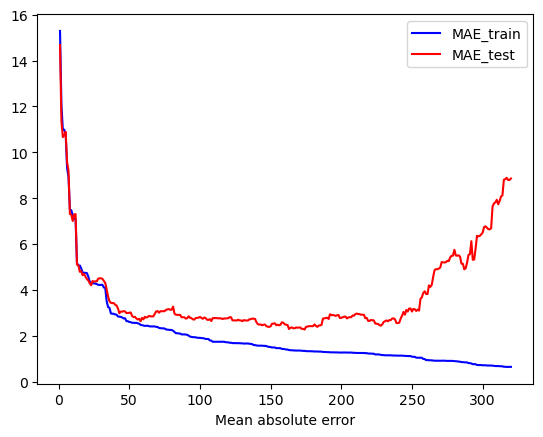

In [92]:
a = np.zeros(m)
k = 320
MAE_train, MAE_test = [], []

for i in range(m):
    a = a + Vt[i,:]*(U[:,i]@y_train)/S[i]
    MAE_train.append(mean_absolute_error(X_train@a, y_train))
    MAE_test.append(mean_absolute_error(X_test@a, y_test))

plt.plot(np.arange(1, m + 1, 1)[:k], MAE_train[:k], color = 'blue', label = 'MAE_train')
plt.plot(np.arange(1, m + 1, 1)[:k], MAE_test[:k], color = 'red', label = 'MAE_test')
plt.xlabel('Rank')
plt.xlabel('Mean absolute error')
plt.legend()
plt.show()